In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from numba import njit
from fits_library import *

In [3]:
@njit
def walk_2D(n_steps):
    """
    2D random walk where at each iteration go up, down, left or right with equal probabilities
    """

    toss = 0; x_pos = 0; y_pos = 0;
    x_traj = np.zeros(n_steps); y_traj = np.zeros(n_steps)

    for i in range(n_steps):
        toss = np.random.randint(0,4) #0 is right, 1 is left, 2 is up, 3 is down
        if toss == 0:
            x_pos += 1
        elif toss == 1:
            x_pos -= 1
        elif toss == 2:
            y_pos += 1
        elif toss == 3:
            y_pos -= 1
        x_traj[i] = x_pos; y_traj[i] = y_pos
    final_x = x_traj[-1]; final_y = y_traj[-1]
    return final_x, x_traj, final_y, y_traj

In [4]:
#Perform the random walk for 2^13 steps for 2^15 times
n_steps = 2 ** 13; N = 2 ** 15;
X_traj, Y_traj = np.zeros((N, n_steps)), np.zeros((N, n_steps))
X_final, Y_final = np.zeros(N), np.zeros(N)
for i in range(N):
    X_final[i], X_traj[i], Y_final[i], Y_traj[i] = walk_2D(n_steps)

In [5]:
"""
Do a Gaussian fit to data
"""
mu_x, sigma_x = norm.fit(X_final)
x = np.linspace(-210, 210, 10000)
pdf_x = norm.pdf(x, mu_x, sigma_x)
print(mu_x, sigma_x)

-0.408935546875 64.37012891719387


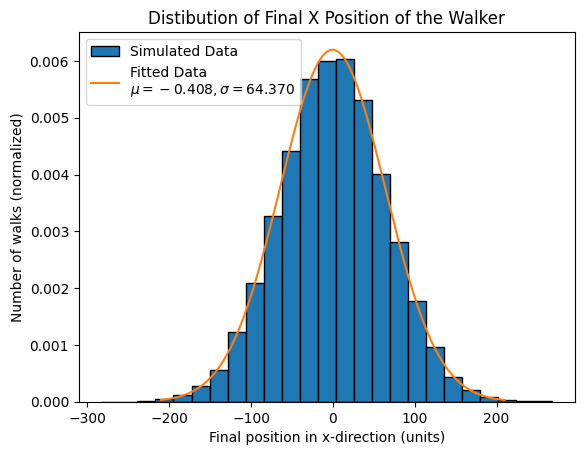

In [12]:
plt.hist(X_final, density = True, bins = 25, edgecolor = 'k', label="Simulated Data")
plt.plot(x, pdf_x, label="Fitted Data\n"r"$\mu"f" = {round(mu_x, 3)}," r" \sigma"f" = {round(sigma_x, 3)}$")
plt.title("Distibution of Final X Position of the Walker")
plt.xlabel("Final position in x-direction (units)")
plt.ylabel("Number of walks (normalized)")
plt.legend()
plt.show()

In [13]:
"""
Do a Gaussian fit to data
"""
mu_y, sigma_y = norm.fit(Y_final)
y = np.linspace(-210, 210, 10000)
pdf_y = norm.pdf(y, mu_y, sigma_y)
print(mu_y, sigma_y)

0.2054443359375 64.29343639915002


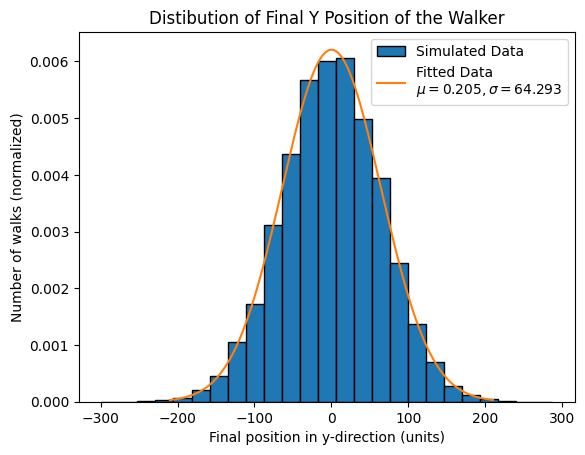

In [15]:
plt.hist(Y_final, bins = 25, density = True, edgecolor = 'k', label="Simulated Data")
plt.plot(y, pdf_y, label="Fitted Data\n"r"$\mu = 0.205, \sigma = 64.293$")
plt.title("Distibution of Final Y Position of the Walker")
plt.xlabel("Final position in y-direction (units)")
plt.ylabel("Number of walks (normalized)")
plt.legend()
plt.show()

In [ ]:
"""
Mean distance covered and how standard deviation is related to number of steps
"""
mean_distance = np.sqrt(mu_x ** 2 + mu_y ** 2)
sigma_sums = (sigma_x ** 2 + sigma_y ** 2)

print(f"The mean distance covered is {mean_distance}")
print(f"The standard deviation in x-direction is {sigma_x} and in the y-direction is {sigma_y}")
print(f"The squared sums are {sigma_sums} and the number of steps is {n_steps}")

The mean distance covered is 0.44789006649550095
The standard deviation in x-direction is 63.66392224734422 and in the y-direction is 64.02154315103341
The squared sums are 8151.852983355524 and the number of steps is 8192


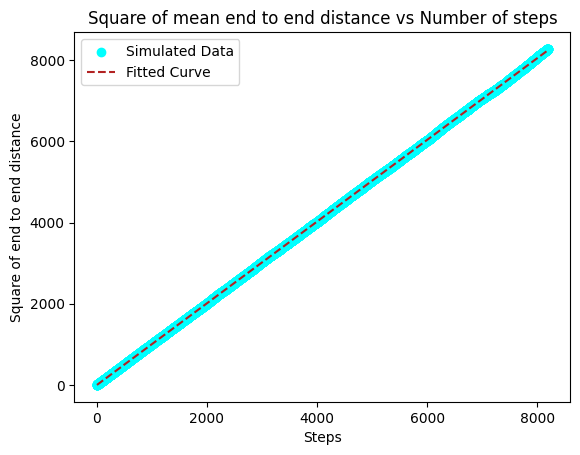

In [19]:
X_traj_sq = X_traj ** 2
Y_traj_sq = Y_traj ** 2

steps_arr = np.arange(1, n_steps+1, 1)
avg_X = np.mean(X_traj_sq, axis = 0)
avg_Y = np.mean(Y_traj_sq, axis = 0)
Rd_squared = (avg_X + avg_Y)
plt.scatter(steps_arr, Rd_squared, label = 'Simulated Data', color = 'aqua')
slope, intercept, slope_err, intercept_err = linear_fit(steps_arr, Rd_squared)
plt.plot(steps_arr, slope * steps_arr + intercept, '--', color = 'firebrick', label = 'Fitted Curve')
plt.xlabel("Steps")
plt.ylabel("Square of end to end distance")
plt.title("Square of mean end to end distance vs Number of steps")
plt.legend()
plt.show()

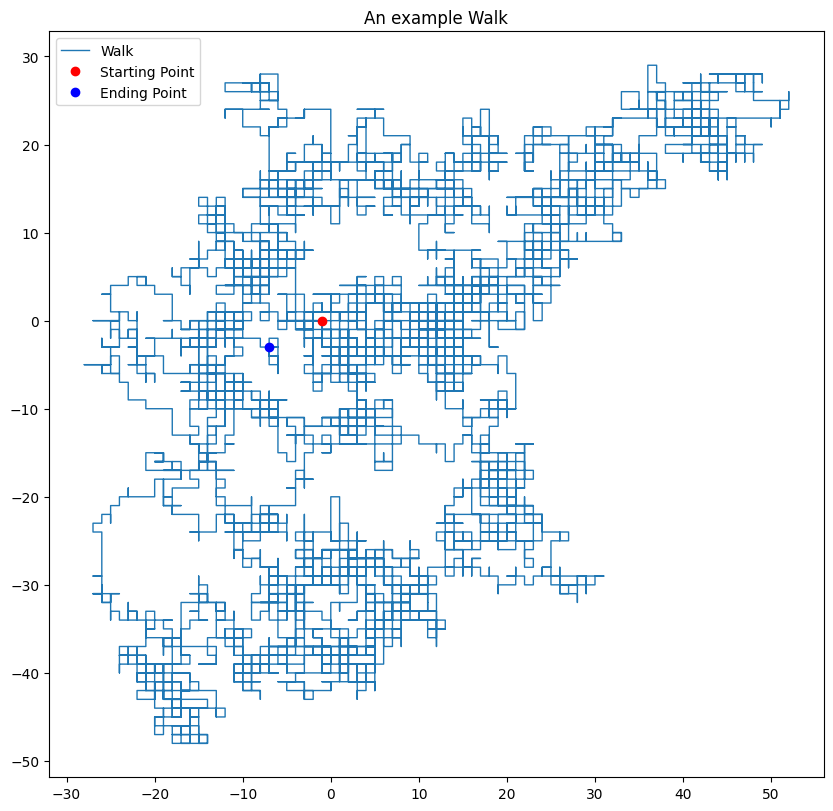

In [35]:
plt.figure(figsize = (10, 10))
plt.plot(X_traj[0], Y_traj[0], lw = 1, label = 'Walk')
plt.plot(X_traj[0][0], Y_traj[0][0], 'ro', label = 'Starting Point')
plt.plot(X_final[0], Y_final[0], 'bo', label = 'Ending Point')
plt.gca().set_aspect('equal')
plt.title("An example Walk")
plt.legend()
plt.show()